# Experimental Analysis

### Imports

In [1]:
from datasets import load_dataset 
import CodeSyntaxConcept.utils as utils
from CodeSyntaxConcept.tokenizer import CodeTokenizer
from CodeSyntaxConcept.parser import TreeSitterParser
import pandas as pd
import seaborn as sns


/home/svelascodimate/miniconda3/envs/code-syntax-concept/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load Samples

In [2]:
language = "python"
#number_of_samples = 2

test_set = load_dataset("code_search_net", split='test')
test_set = test_set.filter(lambda sample: True if 
                sample['language']== language 
            else False, num_proc=1)

#test_set = utils.get_random_sub_set_test_set(test_set, number_of_samples)

No config specified, defaulting to: code_search_net/all
Found cached dataset code_search_net (/home/svelascodimate/.cache/huggingface/datasets/code_search_net/all/1.0.0/80a244ab541c6b2125350b764dc5c2b715f65f00de7a56107a28915fac173a27)
Loading cached processed dataset at /home/svelascodimate/.cache/huggingface/datasets/code_search_net/all/1.0.0/80a244ab541c6b2125350b764dc5c2b715f65f00de7a56107a28915fac173a27/cache-3fbe88ea46cf0b42.arrow


### Mapping Sample Concepts

In [3]:
#checkpoint loading just to use the parser in CodeTokenizer,
checkpoint = "EleutherAI/gpt-neo-125M"
parser = TreeSitterParser(CodeTokenizer.from_pretrained(checkpoint,language))

In [4]:
test_set_node_counts = [[]]*len(parser.tokenizer.node_types)
for sample in test_set:
    tree = parser.tokenizer.parser.parse(bytes(sample['whole_func_string'], "utf8"))
    for ast_element in parser.tokenizer.node_types:
        ast_element_ocurrences = []
        utils.find_nodes(tree.root_node, ast_element, ast_element_ocurrences)
        test_set_node_counts[parser.tokenizer.node_types.index(ast_element)] = test_set_node_counts[parser.tokenizer.node_types.index(ast_element)] + [len(ast_element_ocurrences)]

In [5]:
test_set_node_frequencies = [sum(ast_frequency)/len(ast_frequency) for ast_frequency in test_set_node_counts]
assert test_set_node_frequencies[180] == sum(test_set_node_counts[180])/len(test_set_node_counts[180])

In [6]:
node_frequencies_dataframe = pd.DataFrame([], columns=['ast_element', 'average'])
for node_id, node_frequency in enumerate(test_set_node_frequencies):
    node_frequencies_dataframe.loc[len(node_frequencies_dataframe.index)] = [parser.tokenizer.node_types[node_id], node_frequency]

In [7]:
node_frequencies_dataframe.to_csv('output/node_frequencies_dataframe.csv')

### Loading Dataframe (if computed already)

In [2]:
node_frequencies_dataframe = pd.read_csv('output/node_frequencies_dataframe.csv')

### Visualization

In [3]:
node_frequencies_dataframe

,Unnamed: 0,ast_element,average
0,0,class_definition,0.003562
1,1,type,0.135913
2,2,dictionary,0.211355
3,3,list_comprehension,0.126804
4,4,global,0.014520
...,...,...,...
190,190,not,0.541982
191,191,raise_statement,0.305826
192,192,float,0.181683
193,193,+,0.493597


              ast_element    average
6              identifier  40.608451
26                      "  11.048250
170                     .   9.292614
76                      )   9.148629
35                      (   9.148629
88              attribute   7.716811
111                     ,   7.439935
185  expression_statement   7.147367
29                      =   6.536481
99          argument_list   6.167659
79                   call   5.956394
144                string   5.523178
174                     :   5.081575
118            assignment   4.171852
19                      [   2.549242
182                     ]   2.549242
58                     if   1.846230
141               integer   1.801452
65              subscript   1.717217
123               comment   1.565341
114      keyword_argument   1.557224
24    comparison_operator   1.364313
9            if_statement   1.318768
160      return_statement   1.092578
169                return   1.092578
126            parameters   1.073773
6

<AxesSubplot: title={'center': 'Top 30 More Frequent Concepts'}, xlabel='ast_element'>

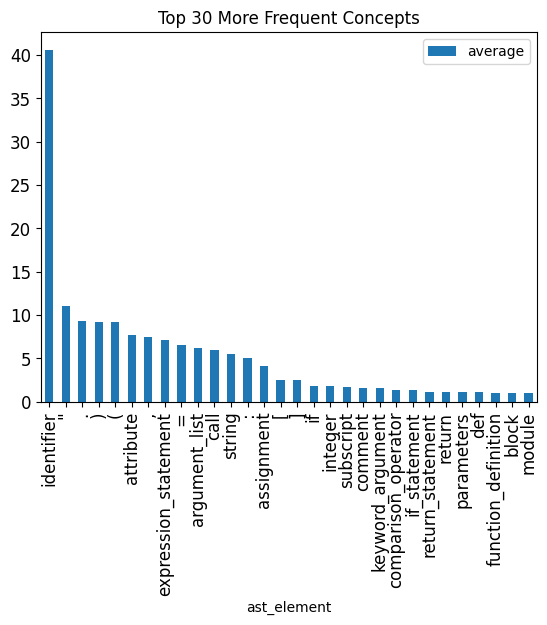

In [5]:
top_10 = node_frequencies_dataframe.sort_values(by=['average'], ascending=False).head(30)
top_10 = top_10.drop('Unnamed: 0', axis=1)
print(top_10)
top_10.plot(x='ast_element',kind='bar',fontsize=12, title='Top 30 More Frequent Concepts')

                  ast_element   average
97                         @=  0.000000
89                case_clause  0.000000
85            wildcard_import  0.000000
40          _simple_statement  0.000000
124      positional_separator  0.000000
18                       exec  0.000000
125                     match  0.000000
129        primary_expression  0.000000
84                         }}  0.000000
14                  parameter  0.000000
131  parenthesized_list_splat  0.000000
95                 expression  0.000000
31           named_expression  0.000000
143              case_pattern  0.000000
34                         {{  0.000000
164                        :=  0.000000
63    future_import_statement  0.000000
172                   pattern  0.000000
57                 __future__  0.000000
176                      case  0.000000
181            exec_statement  0.000000
50          format_expression  0.000000
132       _compound_statement  0.000000
105           match_statement  0.000000


<AxesSubplot: title={'center': 'Top 30 Less Frequent Concepts'}, xlabel='ast_element'>

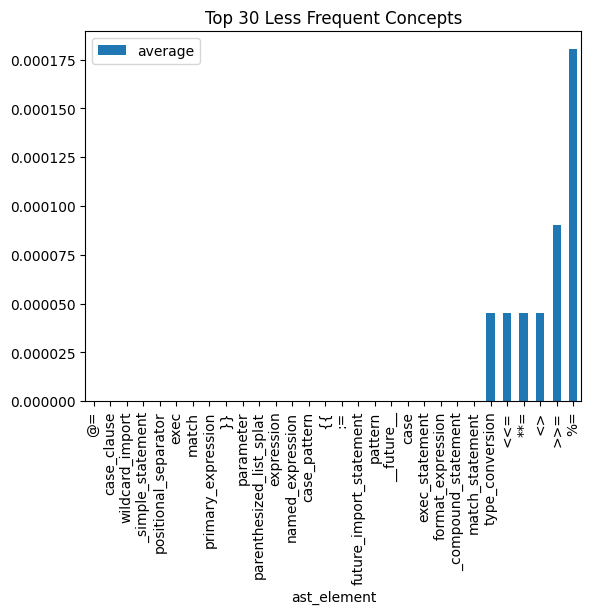

In [38]:
bottom_30 = node_frequencies_dataframe.sort_values(by=['average'], ascending=True).head(30)
print(bottom_30)
bottom_30.plot(x='ast_element',kind='bar', title='Top 30 Less Frequent Concepts')